# Clustering de chansons

In [1]:
import util
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

conn, cur = util.connexion()

## Etude des corrélations

In [2]:
df = pd.read_sql_query('SELECT titre, public."NbPassagesMC"(titre,current_date), public."NbPassages50"(titre,current_date),	public."NbPassages40"(titre,current_date), public."NbPassages30"(titre,current_date), public."NbPassages20"(titre,current_date), public."NbPassages20k"(titre,current_date) FROM public."Chanson"',con=conn)
df

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
0,Vous permettez Monsieur,1,0,2,2,1,2
1,Ohio,0,0,0,2,1,3
2,Baïla,0,0,0,1,1,0
3,Respect,0,0,0,0,0,0
4,Simple et funky,0,0,0,1,3,0
...,...,...,...,...,...,...,...
2233,Je sais pas danser,0,0,0,0,1,0
2234,Un ange frappe à ma porte,0,0,0,0,1,0
2235,Butterfly (Danyel Gérard),0,0,0,0,1,0
2236,Santé,0,0,0,0,1,0


In [3]:
df[df["titre"] == "Viens voir le docteur"]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
449,Viens voir le docteur,0,0,0,0,2,1


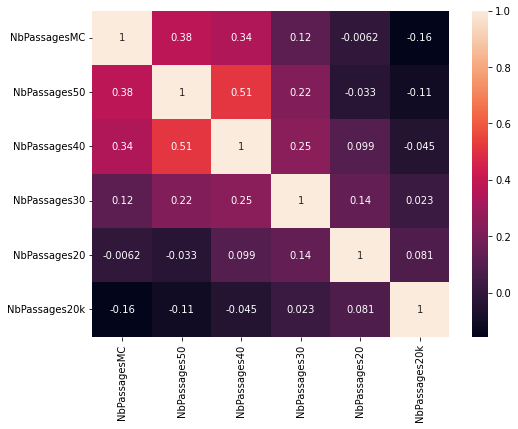

In [4]:
corr_matrix = df.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Clustering

### KMeans

In [5]:
titres = ['Envole-moi', 'Allumer le feu', 'Évidemment (France Gall)', 'Au fur et à mesure']
df[df['titre'].isin(titres)]

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k
607,Évidemment (France Gall),3,0,1,1,1,0
653,Envole-moi,2,5,2,0,0,2
2075,Allumer le feu,1,4,3,3,0,0
2197,Au fur et à mesure,1,0,1,0,2,1


In [6]:
kmeans = KMeans(n_clusters=3).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)


df['cluster'] = kmeans.labels_

for i in range(3):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df.sample(15)

[[2.056      3.778      2.926      1.93       1.12       0.632     ]
 [0.15405165 0.28762244 0.45592164 0.75957257 1.01068566 0.3588602 ]
 [0.13658537 0.57723577 0.95284553 1.20650407 1.52682927 3.01626016]]
Nombre de chansons dans la classe 0 : 500
Nombre de chansons dans la classe 1 : 1124
Nombre de chansons dans la classe 2 : 614


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
331,Parlez-moi de lui,0,1,1,2,1,4,2
961,Les gens du nord,0,0,1,1,1,0,1
947,Le reste,1,0,1,1,1,0,1
1439,Remind me,0,0,0,0,0,0,1
1077,Si tu vas à Rio,0,0,1,0,1,4,2
1067,Musicienne,0,1,0,0,2,2,2
967,C'est ma terre,0,0,0,0,0,2,1
1346,Cosmo,0,3,4,4,0,2,0
276,Marie-Jeanne,0,0,0,0,1,1,1
47,Les comédiens,0,5,3,1,1,0,0


In [7]:
n = 5

kmeans = KMeans(n_clusters=n).fit(df[['NbPassagesMC','NbPassages50','NbPassages40','NbPassages30','NbPassages20','NbPassages20k']])
centroids = kmeans.cluster_centers_
print(centroids)

df['cluster'] = kmeans.labels_



[[0.18367347 1.41399417 2.10787172 2.4548105  2.51895044 1.02040816]
 [0.07009858 0.2245345  0.35706462 0.57831325 0.82475356 0.24205915]
 [1.26168224 5.6588785  2.97663551 1.54672897 0.74766355 0.64018692]
 [4.07619048 2.01428571 2.41904762 1.71904762 1.2        0.64761905]
 [0.05734767 0.43548387 0.65770609 0.89247312 1.08422939 3.10035842]]


In [8]:
for i in range(n):
    nbChansonsCluster = df[df['cluster'] == i]['titre'].count()
    print("Nombre de chansons dans la classe {0} : {1}".format(i, nbChansonsCluster))

df[df["titre"] == "Toi mon amour"]

Nombre de chansons dans la classe 0 : 343
Nombre de chansons dans la classe 1 : 913
Nombre de chansons dans la classe 2 : 214
Nombre de chansons dans la classe 3 : 210
Nombre de chansons dans la classe 4 : 558


,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
896,Toi mon amour,0,1,0,2,3,2,0


On détermine dans chaque cluster combien il y a de mêmes chansons, de 20k et de random

In [9]:
for c in range(n):
    total = df[df['cluster']==c]['titre'].count()
    mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
    vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
    print("Pour le cluster {0} qui contient {1} chansons".format(c, total))
    print("Nombre de MC : {0}".format(mc))
    print("Nombre de 20k : {0}".format(vingtk))
    print("Nombre de random : {0}".format(reste))
    print("Proportion 20k : {0}".format(round(vingtk/total,3)))
    print()

Pour le cluster 0 qui contient 343 chansons
Nombre de MC : 45
Nombre de 20k : 181
Nombre de random : 117
Proportion 20k : 0.528

Pour le cluster 1 qui contient 913 chansons
Nombre de MC : 43
Nombre de 20k : 206
Nombre de random : 664
Proportion 20k : 0.226

Pour le cluster 2 qui contient 214 chansons
Nombre de MC : 99
Nombre de 20k : 64
Nombre de random : 51
Proportion 20k : 0.299

Pour le cluster 3 qui contient 210 chansons
Nombre de MC : 210
Nombre de 20k : 0
Nombre de random : 0
Proportion 20k : 0.0

Pour le cluster 4 qui contient 558 chansons
Nombre de MC : 23
Nombre de 20k : 535
Nombre de random : 0
Proportion 20k : 0.959



### Etude des clusters

343


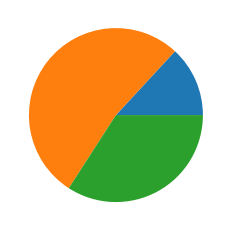

In [12]:
c = 0
total = df[df['cluster']==c]['titre'].count()
mc = df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)]['titre'].count()
vingtk = df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
reste = df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)]['titre'].count()
plt.pie([mc, vingtk, reste])
print(total)
plt.show()

Les mêmes chansons

In [13]:
df[(df['cluster']==c) & (df['NbPassagesMC'] > 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
1184,Padam padam,2,1,1,3,1,1,0
2226,Laissez-nous chanter,1,3,1,1,1,1,0
1742,Alexandrie Alexandra,1,2,5,4,0,0,0
399,Vanina,2,0,0,2,4,0,0
396,Du côté de chez Swann,1,0,3,1,6,0,0
400,Est-ce que tu viens pour les vacances,1,2,3,1,2,2,0
1086,L'oiseau et l'enfant,1,3,1,1,2,2,0
1301,Il y a trop de gens qui t'aiment,3,0,0,5,2,2,0
1303,Vivo per lei,1,2,2,3,3,2,0
2202,Millésime,1,0,1,2,4,1,0


Les 20k

In [14]:
df[(df['cluster']==c) & (df['NbPassages20k'] > 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
127,Le droit à l'erreur,0,2,5,5,1,4,0
492,J'aime plus Paris,0,1,1,3,1,1,0
661,Couleur café,0,3,0,3,1,1,0
956,Mama Sam,0,1,2,4,3,1,0
253,Je m'en vais (Cali),0,0,4,2,3,2,0
1608,Amoureux de ma femme,0,1,2,1,4,3,0
171,Allez reste,0,2,4,1,1,3,0
1955,D'autres que nous,0,1,1,3,0,1,0
1607,Je vole (Louane),0,3,2,1,3,1,0
1115,Simon papa tara,0,1,2,2,3,2,0


Les random

In [15]:
try:
    df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)
    ok = True
except ValueError:
    print("Il n'y a pas de chansons random dans ce cluster")
    ok = False

df[(df['cluster']==c) & (df['NbPassages20k'] == 0) & (df['NbPassagesMC'] == 0)].sample(10)

,titre,NbPassagesMC,NbPassages50,NbPassages40,NbPassages30,NbPassages20,NbPassages20k,cluster
2148,Rien que des mots (ti amo),0,3,3,3,2,0,0
2173,Help Myself,0,1,1,1,5,0,0
1764,Mais je t'aime,0,0,0,2,4,0,0
953,Je dis aime,0,2,6,3,2,0,0
1500,Speed,0,0,3,2,3,0,0
513,Si tu m'aimes,0,2,3,4,4,0,0
787,Facile,0,1,2,5,3,0,0
862,Chante,0,2,1,1,5,0,0
913,L'envie d'aimer,0,1,5,2,2,0,0
1242,Toujours debout,0,3,1,1,2,0,0


In [16]:
prop = np.array([203, 171, 70, 0, 493])
tot = sum(prop)
prop*100/tot

array([21.66488794, 18.24973319,  7.47065101,  0.        , 52.61472785])

## Insertion des clusters en base

In [17]:
def updateQuery(c, titre):
    titre = titre.replace("'","''")
    return "UPDATE public.\"Chanson\" SET \"clusterID\"= {} WHERE titre = '{}';".format(c, titre)

for row in df.iterrows():
    print(row[1]['titre'], " : ", row[1]['cluster'])
    print(updateQuery(row[1]['cluster'], row[1]['titre']))
    cur.execute(updateQuery(row[1]['cluster'], row[1]['titre']))
    conn.commit()

Vous permettez Monsieur  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Vous permettez Monsieur';
Ohio  :  4
UPDATE public."Chanson" SET "clusterID"= 4 WHERE titre = 'Ohio';
Baïla  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Baïla';
Respect  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Respect';
Simple et funky  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Simple et funky';
Fever  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Fever';
La thune  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'La thune';
Oui ou non  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Oui ou non';
Ta reine  :  0
UPDATE public."Chanson" SET "clusterID"= 0 WHERE titre = 'Ta reine';
Tout oublier  :  2
UPDATE public."Chanson" SET "clusterID"= 2 WHERE titre = 'Tout oublier';
Maman me dit  :  1
UPDATE public."Chanson" SET "clusterID"= 1 WHERE titre = 'Maman me dit';
La neige au Sahara  :  0
UPDATE pu

In [18]:
cur.execute('SELECT id, titre, "année", id_artiste, nb_mots, "clusterID" FROM public."Chanson"')

# Clustering d'artistes

On cherche à clusteriser les artistes en plusieurs groupes, afin de créer une variables catégorielle contenant de l'information sur l'artiste

In [13]:
requete = 'SELECT a.artiste, c."année" - c."année"%10 AS decennie, count(*) AS nbChansons FROM public."Artiste" AS a JOIN public."Chanson" AS c ON a.id_artiste = c.id_artiste WHERE c."année" IS NOT NULL GROUP BY a.artiste, decennie'
df = pd.read_sql_query(requete, con=conn)
df[['decennie']] = df[['decennie']].astype("int32")
df

,artiste,decennie,nbchansons
0,Nougaro Claude,1970,2
1,François Claude,1960,9
2,Trois Cafés Gourmands,2010,1
3,Piaf Édith,1950,8
4,Noir Désir,1980,1
...,...,...,...
915,Renaud,1980,12
916,Brillant Dany,1990,5
917,Dutronc Jacques,1970,2
918,Richard Zachary,1970,1


On pivote pour obtenir comme feature pour chaque artiste le nombre de chanson sortie dans chaque décennie

In [14]:
df = df.pivot(index = 'artiste', columns = 'decennie', values = 'nbchansons')
df = df.replace(np.NaN, 0)
df

decennie,1870,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
artiste,,,,,,,,,,,,
1789 Les Amants de la Bastille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
2 Be 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
47TER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adam & Ève,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Adamo Salvatore,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Zenatti Julie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
À caus' des garçons,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Élie Antoine,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
df.columns

Int64Index([1870, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010,
            2020],
           dtype='int64', name='decennie')

In [39]:
df[[1980]].loc['Indochine']

decennie
1980    6.0
Name: Indochine, dtype: float64

On clusterise sur les colonnes

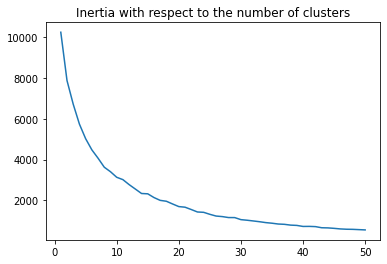

In [45]:
inertias = []
clusters = []

for k in range(1, 51):
    kmeans = KMeans(n_clusters=k).fit(df[[1870, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]])
    inertias.append(kmeans.inertia_)
    clusters.append(k)

plt.plot(clusters, inertias)
plt.title("Inertia with respect to the number of clusters")
plt.show()

Essayons avec 20 clusters

In [46]:
kmeans = KMeans(n_clusters=20).fit(df[[1870, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]])
df['cluster'] = kmeans.labels_

In [61]:
df[df.cluster == 10]

decennie,1870,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,cluster
artiste,,,,,,,,,,,,,
BB Brunes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,0.0,10
Bent Amel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,10
Bruni Carla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10
Bénabar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2.0,0.0,10
Cali,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10
Corneille,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,10
Diam's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,10
Fiori Patrick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,10
Grégoire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,10
